In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
url = '/Users/maria/Desktop/milestone1/New_Data.csv'
df = pd.read_csv(url)


/Users/maria/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Summary statistics
print(df.describe())

       passenger_count  trip_distance    fare_amount          extra  \
count    643019.000000  643019.000000  643019.000000  643019.000000   
mean          1.283247       3.852597      15.903753       0.490449   
std           0.927250       4.486304      14.416081       0.810778   
min           1.000000       0.000000       0.000000       0.000000   
25%           1.000000       1.110000       7.000000       0.000000   
50%           1.000000       2.180000      11.000000       0.000000   
75%           1.000000       4.770000      19.500000       0.500000   
max           9.000000     603.800000     944.980000      11.000000   

             mta_tax     tip_amount   tolls_amount  improvement_surcharge  \
count  643019.000000  643019.000000  643019.000000          643019.000000   
mean        0.490624       0.855507       0.319202               0.255056   
std         0.067824       1.807703       1.404090               0.107066   
min         0.000000       0.000000       0.000000  

In [3]:
# Display the first few rows of the dataframe
print(df.head())


   passenger_count  trip_distance  fare_amount  extra  mta_tax  tip_amount  \
0              1.0           0.00          3.5    0.5      0.5        1.44   
1              1.0           0.72          5.5    0.5      0.5        1.36   
2              1.0           0.50          4.0    0.5      0.5        0.00   
3              1.0           1.19          6.0    0.5      0.5        1.46   
4              1.0           0.55          4.0    0.5      0.5        0.00   

   tolls_amount  improvement_surcharge  total_amount  congestion_surcharge  \
0           0.0                    0.3          6.24                   0.0   
1           0.0                    0.3          8.16                   0.0   
2           0.0                    0.3          5.30                   0.0   
3           0.0                    0.3          8.76                   0.0   
4           0.0                    0.3          5.30                   0.0   

   ... rate_type_Negotiated fare rate_type_Standard rate rate_

In [4]:
# Get a summary of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643019 entries, 0 to 643018
Data columns (total 35 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   passenger_count                           643019 non-null  float64
 1   trip_distance                             643019 non-null  float64
 2   fare_amount                               643019 non-null  float64
 3   extra                                     643019 non-null  float64
 4   mta_tax                                   643019 non-null  float64
 5   tip_amount                                643019 non-null  float64
 6   tolls_amount                              643019 non-null  float64
 7   improvement_surcharge                     643019 non-null  float64
 8   total_amount                              643019 non-null  float64
 9   congestion_surcharge                      643019 non-null  float64
 10  pu_state            

## ./calculate the highest, lowest, and average total amounts in the dataset, respectively. These metrics provide a quick overview of the distribution of total amounts.

## ./defines the edges of the bins used for discretizing the 'total_amount column'.

## ./discretizes the 'total_amount column' into the defined bins and assigns labels to each bin. This creates a new categorical column,' total_amount_category', based on the total amount ranges.

## ./prints the number of customers falling into each category (Low, Medium, High) based on the discretized total amounts.

In [2]:
# Calculate the highest and lowest total amount
#calculate the highest, lowest, and average total amounts in the dataset,
#respectively. These metrics provide a quick overview of the distribution of total amounts.
highest_total_amount = df['total_amount'].max()
lowest_total_amount = df['total_amount'].min()
average_total_amount = df['total_amount'].mean()

# Define the new bin edges and labels
bin_edges = [0, 50, 80, 945]
labels = ['Low', 'Medium', 'High']

# Discretize the total_amount column
df['total_amount_category'] = pd.cut(df['total_amount'], bins=bin_edges, labels=labels, include_lowest=True)

# Reorder columns to place total_amount_category after total_amount
cols = df.columns.tolist()
total_amount_index = cols.index('total_amount')
cols.insert(total_amount_index + 1, cols.pop(cols.index('total_amount_category')))
df = df[cols]

# Print the highest and lowest total amount
print(f"Highest total amount: {highest_total_amount}")
print(f"Lowest total amount: {lowest_total_amount}")
print(f"Average total amount: {average_total_amount}")

# Print the range for each category
for i, label in enumerate(labels):
    lower_bound = bin_edges[i]
    upper_bound = bin_edges[i + 1]
    print(f"Range for {label}: {lower_bound} to {upper_bound}")

# Print number of customers in each category
print("\nNumber of customers in each category:")
print(df['total_amount_category'].value_counts())

Highest total amount: 944.98
Lowest total amount: 0.0
Average total amount: 18.595956620255393
Range for Low: 0 to 50
Range for Medium: 50 to 80
Range for High: 80 to 945

Number of customers in each category:
total_amount_category
Low       607905
Medium     31762
High        3352
Name: count, dtype: int64


In [3]:
# Print the total number of occurrences for each category
category_counts = df['total_amount_category'].value_counts()
print("\nTotal number of occurrences for each category:")
print(category_counts)


Total number of occurrences for each category:
total_amount_category
Low       607905
Medium     31762
High        3352
Name: count, dtype: int64


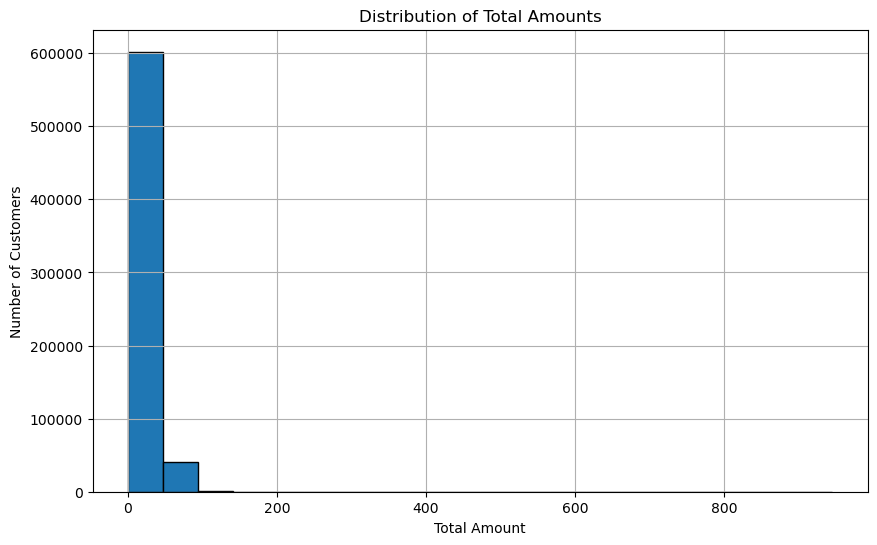

In [7]:
# Visualize the data
plt.figure(figsize=(10, 6))
plt.hist(df['total_amount'], bins=20, edgecolor='black')
plt.title('Distribution of Total Amounts')
plt.xlabel('Total Amount')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()

## Converting to Datetime:

 convert the specified columns to datetime format. This allows for easier extraction of date and time components.
Extracting Hour of Day:




In [4]:
# Extract features from datetime columns
df['pickup_date'] = pd.to_datetime(df['pickup_date'])
df['dropoff_date'] = pd.to_datetime(df['dropoff_date'])
df['pickup_time'] = pd.to_datetime(df['pickup_time'])
df['dropoff_time'] = pd.to_datetime(df['dropoff_time'])

df['pickup_hour'] = df['pickup_time'].dt.hour
df['dropoff_hour'] = df['dropoff_time'].dt.hour
df['pickup_day_of_week'] = df['pickup_date'].dt.dayofweek
df['dropoff_day_of_week'] = df['dropoff_date'].dt.dayofweek
# Convert time durations to seconds
df['trip_duration_seconds'] = pd.to_timedelta(df['trip_duration']).dt.total_seconds()


# Drop original datetime columns
df = df.drop(columns=['pickup_date', 'dropoff_date', 'pickup_time', 'dropoff_time'])


In [9]:
# Display the first few rows of the dataframe
print(df.head())

   passenger_count  trip_distance  fare_amount  extra  mta_tax  tip_amount  \
0              1.0           0.00          3.5    0.5      0.5        1.44   
1              1.0           0.72          5.5    0.5      0.5        1.36   
2              1.0           0.50          4.0    0.5      0.5        0.00   
3              1.0           1.19          6.0    0.5      0.5        1.46   
4              1.0           0.55          4.0    0.5      0.5        0.00   

   tolls_amount  improvement_surcharge  total_amount total_amount_category  \
0           0.0                    0.3          6.24                   Low   
1           0.0                    0.3          8.16                   Low   
2           0.0                    0.3          5.30                   Low   
3           0.0                    0.3          8.76                   Low   
4           0.0                    0.3          5.30                   Low   

   ...  payment_type_Missing payment_type_Neither trip_type_Di

In [10]:
# Print all column names
print("Column names:", df.columns.tolist())

Column names: ['passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'total_amount_category', 'congestion_surcharge', 'pu_state', 'pu_zone', 'do_state', 'do_zone', 'trip_duration', 'pickup_date_label', 'dropoff_date_label', 'vendor_Creative Mobile Technologies, LLC', 'vendor_VeriFone Inc.', 'store_and_fwd_flag_N', 'store_and_fwd_flag_Y', 'rate_type_Negotiated fare', 'rate_type_Standard rate', 'rate_type_other', 'payment_type_Cash', 'payment_type_Credit card', 'payment_type_Missing', 'payment_type_Neither', 'trip_type_Dispatch', 'trip_type_Street-hail', 'trip_type_Unknown', 'pickup_hour', 'dropoff_hour', 'pickup_day_of_week', 'dropoff_day_of_week', 'trip_duration_seconds']


## 1-LOGISTIC REGRESSION

## Precision, Recall, and F1-Score: The logistic regression model shows high precision and recall for the "Low" category, indicating that the model is very good at predicting this class. However, for the "High" category, both precision and recall are 0, which means the model did not predict this class correctly at all. The "Medium" category has a precision of 0.8 and recall of 0.68, indicating good performance but with some room for improvement.

## Accuracy: The overall accuracy of the model is 0.98, which is high and indicates that the model performs well on the test set.
Confusion Matrix (percentages): The confusion matrix percentages show that most predictions are concentrated in the "Low" category, which has 99.6% accuracy. However, there are significant misclassifications in the "Medium" category, with 32% of predictions being misclassified.


Training set shape: (450113, 23) (450113,)
Testing set shape: (192906, 23) (192906,)
Training set size: 450113
Testing set size: 192906
The best Parameters are: {'C': 0.01, 'penalty': 'l1'}
Test Set Evaluation:
Cross-validation scores: [0.97454772 0.97545424 0.97579119 0.97610223 0.97441746]
Mean accuracy: 0.975262566819333
Standard deviation of accuracy: 0.000670287893763793

Classification Report:


/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

        High       0.00      0.00      0.00      1016
         Low       0.98      1.00      0.99    182430
      Medium       0.80      0.68      0.73      9460

    accuracy                           0.98    192906
   macro avg       0.59      0.56      0.57    192906
weighted avg       0.97      0.98      0.97    192906


Confusion Matrix (percentages):
0.0 8.1 91.9
0.0 99.6 0.4
0.0 32.0 68.0


/Users/maria/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/maria/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/maria/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/maria/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/maria/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas require

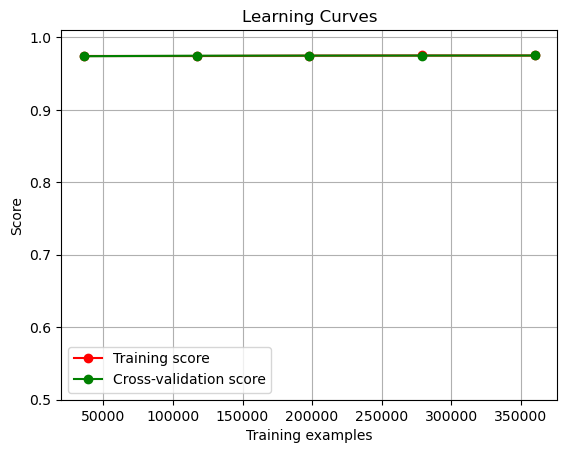

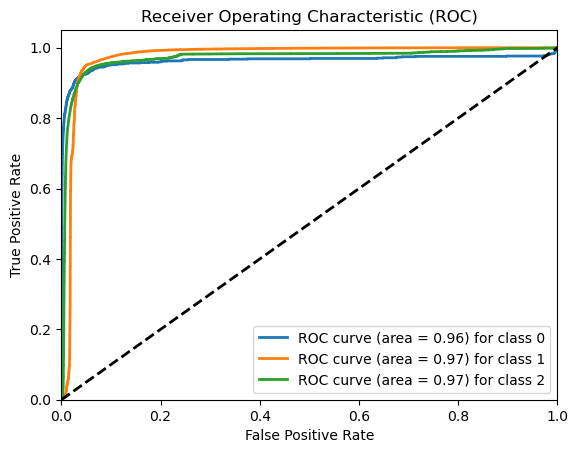

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Assuming df is your DataFrame
# df = pd.read_csv('your_dataset.csv')

# Split data into features and target
X = df.drop(columns=['fare_amount','tip_amount','extra','congestion_surcharge',
                     'mta_tax','tolls_amount','improvement_surcharge',
                     'total_amount_category','pu_state', 'do_state', 'pu_zone', 'do_zone','total_amount','trip_duration'])
y = df['total_amount_category']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display the dimensions of the datasets
print("Training set shape:", X_train_scaled.shape, y_train.shape)
print("Testing set shape:", X_test_scaled.shape, y_test.shape)
print("Training set size:", X_train_scaled.shape[0])
print("Testing set size:", X_test_scaled.shape[0])

# Initialize the logistic regression model
model = LogisticRegression(solver='liblinear')  # Adding solver to avoid warnings

# Define the hyperparameter grid for fine-tuning
param_grid = {
    'C': [0.01, 0.1, 1.0, 10.0],  # regularization strength
    'penalty': ['l1', 'l2'],  # regularization type
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best model
model = grid_search.best_estimator_
print("The best Parameters are:", grid_search.best_params_)

# Evaluate the model on the test set
def evaluate_model_with_cv(model, X, y):
    # Perform k-fold cross-validation
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"Cross-validation scores: {cv_scores}")
    print(f"Mean accuracy: {cv_scores.mean()}")
    print(f"Standard deviation of accuracy: {cv_scores.std()}")
    
    # Fit the model and make predictions
    model.fit(X, y)
    y_pred = model.predict(X)
    
    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y, y_pred))
    
    # Calculate confusion matrix and convert to percentages
    cm = confusion_matrix(y, y_pred)
    cm_percentage = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100, 2)
    
    # Print confusion matrix as percentages with desired formatting
    print("\nConfusion Matrix (percentages):")
    for row in cm_percentage:
        print(" ".join(f"{val:.1f}" for val in row))

print("Test Set Evaluation:")
evaluate_model_with_cv(model, X_test_scaled, y_test)

# Plot learning curves
train_sizes, train_scores, test_scores = learning_curve(model, X_train_scaled, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Learning Curves")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.ylim((0.5, 1.01))
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()

# Plot ROC curve
y_bin_test = label_binarize(y_test, classes=np.unique(y_test))
n_classes_test = y_bin_test.shape[1]

if n_classes_test == 1:
    y_bin_test = np.hstack([1 - y_bin_test, y_bin_test])
    n_classes_test = 2

y_score_test = model.decision_function(X_test_scaled)
fpr_test = dict()
tpr_test = dict()
roc_auc_test = dict()
for i in range(n_classes_test):
    fpr_test[i], tpr_test[i], _ = roc_curve(y_bin_test[:, i], y_score_test[:, i])
    roc_auc_test[i] = auc(fpr_test[i], tpr_test[i])

plt.figure()
for i in range(n_classes_test):
    plt.plot(fpr_test[i], tpr_test[i], lw=2, label=f'ROC curve (area = {roc_auc_test[i]:.2f}) for class {i}')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


## 2-DECISION TREES

## Parameters:

The decision tree classifier is initialized with the following parameters:

Criterion: 'entropy', which measures the quality of a split based on the information gain.
Max Depth: 10, which limits the depth of the tree to prevent overfitting.
Min Samples Leaf: 10, which sets the minimum number of samples required to be at a leaf node.
Min Samples Split: 2, which sets the minimum number of samples required to split an internal node.
These parameters are chosen based on the results of the grid search with cross-validation, where they were found to provide optimal performance.

## Cross-Validation:

The model is evaluated using k-fold cross-validation with k=5. Here’s an analysis of the cross-validation results:

## Cross-validation scores: The model achieves consistent high accuracy scores across folds, with values ranging from approximately 0.978 to 0.981.
Mean accuracy: The mean accuracy across all folds is approximately 0.9801.
Standard deviation of accuracy: The standard deviation of the accuracy scores is very low, indicating that the model's performance is stable across different folds.

## Observation on Results:
Precision, Recall, and F1-Score: The logistic regression model shows high precision and recall for the "Low" category, indicating that the model is very good at predicting this class. However, for the "High" category, both precision and recall are 0, which means the model did not predict this class correctly at all. The "Medium" category has a precision of 0.8 and recall of 0.68, indicating good performance but with some room for improvement.
Accuracy: The overall accuracy of the model is 0.98, which is high and indicates that the model performs well on the test set.
Confusion Matrix (percentages): The confusion matrix percentages show that most predictions are concentrated in the "Low" category, which has 99.6% accuracy. However, there are significant misclassifications in the "Medium" category, with 32% of predictions being misclassified.


Training set shape: (450113, 23) (450113,)
Testing set shape: (192906, 23) (192906,)
Training set size: 450113
Testing set size: 192906
The best Parameters are: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2}
Test Set Evaluation:
Cross-validation scores: [0.97955005 0.98068998 0.98024935 0.98115653 0.97892745]
Mean accuracy: 0.9801146701741829
Standard deviation of accuracy: 0.0007953449620479173

Classification Report:
              precision    recall  f1-score   support

        High       0.83      0.65      0.73      1016
         Low       0.99      0.99      0.99    182430
      Medium       0.84      0.81      0.83      9460

    accuracy                           0.98    192906
   macro avg       0.89      0.82      0.85    192906
weighted avg       0.98      0.98      0.98    192906


Confusion Matrix (percentages):
65.3 6.3 28.4
0.0 99.4 0.6
1.4 17.5 81.1


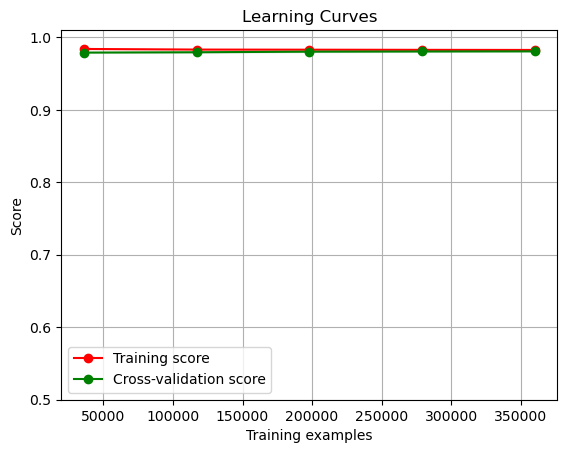

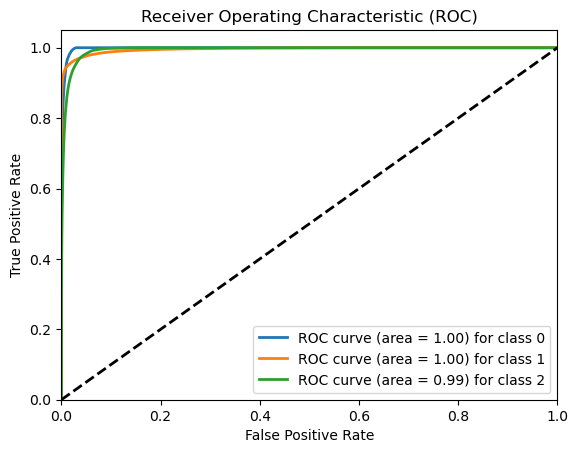

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Assuming df is your DataFrame
# df = pd.read_csv('your_dataset.csv')

# Split data into features and target
X = df.drop(columns=['fare_amount','tip_amount','extra','congestion_surcharge',
                     'mta_tax','tolls_amount','improvement_surcharge',
                     'total_amount_category','pu_state', 'do_state', 'pu_zone', 'do_zone','total_amount','trip_duration'])
y = df['total_amount_category']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display the dimensions of the datasets
print("Training set shape:", X_train_scaled.shape, y_train.shape)
print("Testing set shape:", X_test_scaled.shape, y_test.shape)
print("Training set size:", X_train_scaled.shape[0])
print("Testing set size:", X_test_scaled.shape[0])

# Initialize the Decision Tree model
model = DecisionTreeClassifier(random_state=42)

# Define the hyperparameter grid for fine-tuning
param_grid = {
    'criterion': ['gini', 'entropy'],  # Criterion for splitting
    'max_depth': [None, 10],  # Maximum depth of the tree
    'min_samples_split': [2,10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [5, 10]  # Minimum number of samples required to be at a leaf node
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Get the best model
model = grid_search.best_estimator_
print("The best Parameters are:", grid_search.best_params_)

# Evaluate the model on the test set
def evaluate_model_with_cv(model, X, y):
    # Perform k-fold cross-validation
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"Cross-validation scores: {cv_scores}")
    print(f"Mean accuracy: {cv_scores.mean()}")
    print(f"Standard deviation of accuracy: {cv_scores.std()}")
    
    # Fit the model and make predictions
    model.fit(X, y)
    y_pred = model.predict(X)
    
    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y, y_pred))
    
    # Calculate confusion matrix and convert to percentages
    cm = confusion_matrix(y, y_pred)
    cm_percentage = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100, 2)
    
    # Print confusion matrix as percentages with desired formatting
    print("\nConfusion Matrix (percentages):")
    for row in cm_percentage:
        print(" ".join(f"{val:.1f}" for val in row))

print("Test Set Evaluation:")
evaluate_model_with_cv(model, X_test_scaled, y_test)

# Plot learning curves
train_sizes, train_scores, test_scores = learning_curve(model, X_train_scaled, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Learning Curves")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.ylim((0.5, 1.01))
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()

# Plot ROC curve
y_bin_test = label_binarize(y_test, classes=np.unique(y_test))
n_classes_test = y_bin_test.shape[1]

if n_classes_test == 1:
    y_bin_test = np.hstack([1 - y_bin_test, y_bin_test])
    n_classes_test = 2

y_score_test = model.predict_proba(X_test_scaled)
fpr_test = dict()
tpr_test = dict()
roc_auc_test = dict()
for i in range(n_classes_test):
    fpr_test[i], tpr_test[i], _ = roc_curve(y_bin_test[:, i], y_score_test[:, i])
    roc_auc_test[i] = auc(fpr_test[i], tpr_test[i])

plt.figure()
for i in range(n_classes_test):
    plt.plot(fpr_test[i], tpr_test[i], lw=2, label=f'ROC curve (area = {roc_auc_test[i]:.2f}) for class {i}')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


## 3-KNN CLASSIFIER

## Best Parameters:

n_neighbors: 10
This parameter defines the number of nearest neighbors to consider when making a prediction. The optimal value found is 10, indicating that the model performs best when it considers the 10 closest data points.
## Cross-Validation:

Cross-Validation Scores: [0.97781349, 0.97897929, 0.97887561, 0.97960136, 0.97770924]
These scores show the model's performance on different splits of the training data. They are consistently high, indicating the model's robustness.
## Mean Accuracy: 0.9786
The average accuracy across all cross-validation folds is approximately 97.86%, which is a strong performance indicator.
Standard Deviation of Accuracy: 0.0007
The low standard deviation suggests that the model's performance is stable and does not vary much between different folds.

## Strengths:

The model shows high overall accuracy (0.98), indicating that it generally performs well in predicting the correct class.
Excellent performance for the 'Low' category with precision, recall, and F1-score close to 1.00.
Decent performance for the 'Medium' category with a balanced precision and recall.

## Weaknesses:

The model struggles with predicting the 'High' category, with only 55.1% recall, meaning nearly half of the 'High' instances are misclassified.
A significant portion of 'High' instances are misclassified as 'Medium' (37.6%), which suggests that the model has difficulty distinguishing between these two classes.

Training set shape: (450113, 23) (450113,)
Testing set shape: (192906, 23) (192906,)
Training set size: 450113
Testing set size: 192906
The best Parameters are: {'n_neighbors': 10}
Test Set Evaluation:
Cross-validation scores: [0.97781349 0.97897929 0.97887561 0.97960136 0.97770924]
Mean accuracy: 0.9785957968249234
Standard deviation of accuracy: 0.0007258810029083511

Classification Report:
              precision    recall  f1-score   support

        High       0.83      0.55      0.66      1016
         Low       0.99      1.00      0.99    182430
      Medium       0.85      0.76      0.80      9460

    accuracy                           0.98    192906
   macro avg       0.89      0.77      0.82    192906
weighted avg       0.98      0.98      0.98    192906


Confusion Matrix (percentages):
55.1 7.3 37.6
0.0 99.5 0.5
1.1 22.9 76.0


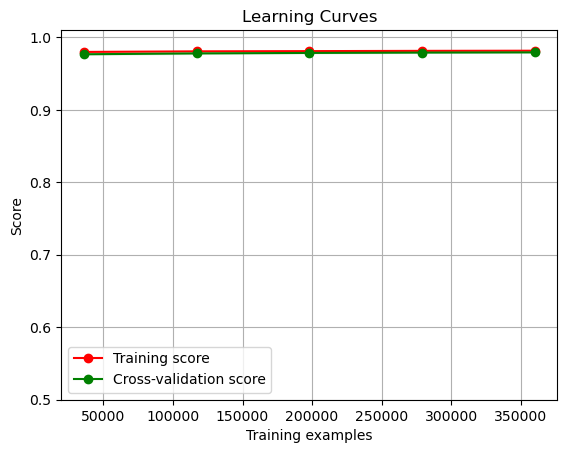

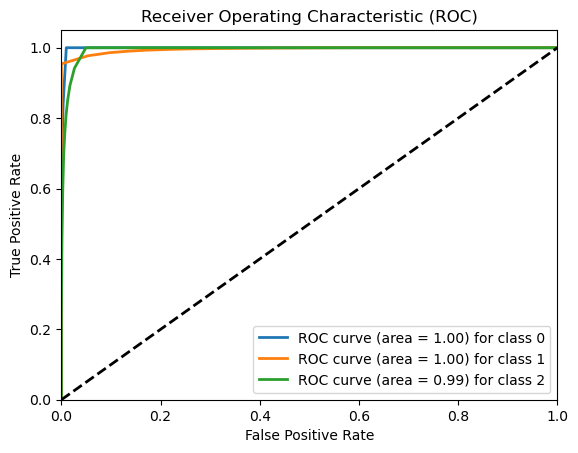

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Assuming df is your DataFrame
# df = pd.read_csv('your_dataset.csv')

# Split data into features and target
X = df.drop(columns=['fare_amount','tip_amount','extra','congestion_surcharge',
                     'mta_tax','tolls_amount','improvement_surcharge',
                     'total_amount_category','pu_state', 'do_state', 'pu_zone', 'do_zone','total_amount','trip_duration'])
y = df['total_amount_category']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display the dimensions of the datasets
print("Training set shape:", X_train_scaled.shape, y_train.shape)
print("Testing set shape:", X_test_scaled.shape, y_test.shape)
print("Training set size:", X_train_scaled.shape[0])
print("Testing set size:", X_test_scaled.shape[0])

# Initialize the KNN model
model = KNeighborsClassifier()

# Define the hyperparameter grid for fine-tuning
param_grid = {
    'n_neighbors': [3, 5, 10]  # Different values for the number of neighbors
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Get the best model
model = grid_search.best_estimator_
print("The best Parameters are:", grid_search.best_params_)

# Evaluate the model on the test set
def evaluate_model_with_cv(model, X, y):
    # Perform k-fold cross-validation
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"Cross-validation scores: {cv_scores}")
    print(f"Mean accuracy: {cv_scores.mean()}")
    print(f"Standard deviation of accuracy: {cv_scores.std()}")
    
    # Fit the model and make predictions
    model.fit(X, y)
    y_pred = model.predict(X)
    
    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y, y_pred))
    
    # Calculate confusion matrix and convert to percentages
    cm = confusion_matrix(y, y_pred)
    cm_percentage = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100, 2)
    
    # Print confusion matrix as percentages with desired formatting
    print("\nConfusion Matrix (percentages):")
    for row in cm_percentage:
        print(" ".join(f"{val:.1f}" for val in row))

print("Test Set Evaluation:")
evaluate_model_with_cv(model, X_test_scaled, y_test)

# Plot learning curves
train_sizes, train_scores, test_scores = learning_curve(model, X_train_scaled, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Learning Curves")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.ylim((0.5, 1.01))
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()

# Plot ROC curve
y_bin_test = label_binarize(y_test, classes=np.unique(y_test))
n_classes_test = y_bin_test.shape[1]

if n_classes_test == 1:
    y_bin_test = np.hstack([1 - y_bin_test, y_bin_test])
    n_classes_test = 2

y_score_test = model.predict_proba(X_test_scaled)
fpr_test = dict()
tpr_test = dict()
roc_auc_test = dict()
for i in range(n_classes_test):
    fpr_test[i], tpr_test[i], _ = roc_curve(y_bin_test[:, i], y_score_test[:, i])
    roc_auc_test[i] = auc(fpr_test[i], tpr_test[i])

plt.figure()
for i in range(n_classes_test):
    plt.plot(fpr_test[i], tpr_test[i], lw=2, label=f'ROC curve (area = {roc_auc_test[i]:.2f}) for class {i}')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


## 4- RANDOM FOREST CLASSIFIER

## Confusion Matrix (percentages):

High Class: 70.3% correctly predicted, 6.5% misclassified as Low, 23.2% misclassified as Medium.
Low Class: 99.6% correctly predicted, 0.4% misclassified as High.
Medium Class: 87.5% correctly predicted, 12.3% misclassified as Low, 0.2% misclassified as High.
Observations:
Overall Performance: Excellent with 99% accuracy.
Low Class: Almost perfect classification.
High Class: High precision but lower recall (70%).
Medium Class: Good balance in prediction metrics.
Confusion Matrix Insight: Some misclassification of High-priced trips as Medium; very few errors for Low and Medium classes.

## Conclusion:
The random forest model is highly effective for predicting trip price categories, with minor improvements needed for better High-priced trip classification.


Training set shape: (450113, 23) (450113,)
Testing set shape: (192906, 23) (192906,)
Training set size: 450113
Testing set size: 192906


/Users/maria/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


The best Parameters are: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Test Set Evaluation:
Cross-validation scores: [0.98040537 0.98146756 0.98024935 0.98146756 0.97996423]
Mean accuracy: 0.9807108141034686
Standard deviation of accuracy: 0.0006338721171398448

Classification Report:
              precision    recall  f1-score   support

        High       0.98      0.70      0.82      1016
         Low       0.99      1.00      0.99    182430
      Medium       0.90      0.88      0.89      9460

    accuracy                           0.99    192906
   macro avg       0.96      0.86      0.90    192906
weighted avg       0.99      0.99      0.99    192906


Confusion Matrix (percentages):
70.3 6.5 23.2
0.0 99.6 0.4
0.2 12.3 87.5


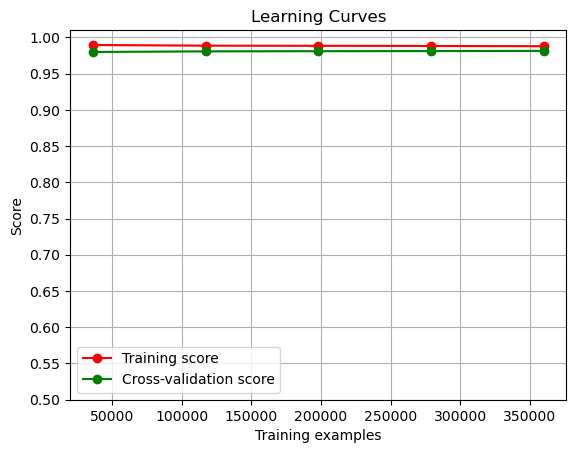

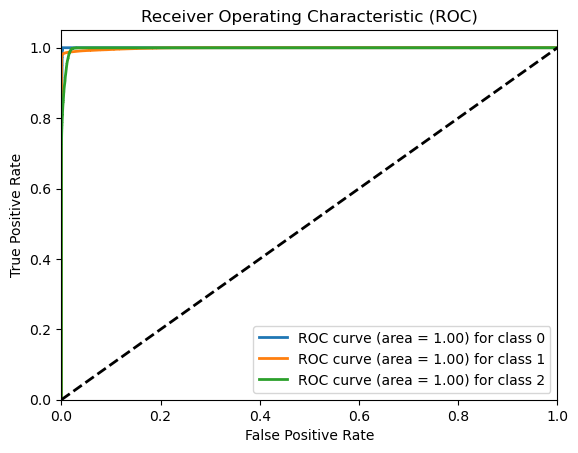

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc



# Split data into features and target
X = df.drop(columns=['fare_amount','tip_amount','extra','congestion_surcharge',
                     'mta_tax','tolls_amount','improvement_surcharge',
                     'total_amount_category','pu_state', 'do_state', 'pu_zone', 'do_zone','total_amount','trip_duration'])
y = df['total_amount_category']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display the dimensions of the datasets
print("Training set shape:", X_train_scaled.shape, y_train.shape)
print("Testing set shape:", X_test_scaled.shape, y_test.shape)
print("Training set size:", X_train_scaled.shape[0])
print("Testing set size:", X_test_scaled.shape[0])

# Initialize the Random Forest model
model = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid for fine-tuning
param_grid = {
    'n_estimators': [50, 100],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 5],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2]  # Minimum number of samples required to be at a leaf node
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Get the best model
model = grid_search.best_estimator_
print("The best Parameters are:", grid_search.best_params_)

# Evaluate the model on the test set
def evaluate_model_with_cv(model, X, y):
    # Perform k-fold cross-validation
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"Cross-validation scores: {cv_scores}")
    print(f"Mean accuracy: {cv_scores.mean()}")
    print(f"Standard deviation of accuracy: {cv_scores.std()}")
    
    # Fit the model and make predictions
    model.fit(X, y)
    y_pred = model.predict(X)
    
    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y, y_pred))
    
    # Calculate confusion matrix and convert to percentages
    cm = confusion_matrix(y, y_pred)
    cm_percentage = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100, 2)
    
    # Print confusion matrix as percentages with desired formatting
    print("\nConfusion Matrix (percentages):")
    for row in cm_percentage:
        print(" ".join(f"{val:.1f}" for val in row))

print("Test Set Evaluation:")
evaluate_model_with_cv(model, X_test_scaled, y_test)

# Plot learning curves
train_sizes, train_scores, test_scores = learning_curve(model, X_train_scaled, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Learning Curves")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.ylim((0.5, 1.01))
plt.yticks(np.arange(0.5, 1.01, 0.05))  # Specify the y-axis ticks
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()

# Plot ROC curve
y_bin_test = label_binarize(y_test, classes=np.unique(y_test))
n_classes_test = y_bin_test.shape[1]

if n_classes_test == 1:
    y_bin_test = np.hstack([1 - y_bin_test, y_bin_test])
    n_classes_test = 2

y_score_test = model.predict_proba(X_test_scaled)
fpr_test = dict()
tpr_test = dict()
roc_auc_test = dict()
for i in range(n_classes_test):
    fpr_test[i], tpr_test[i], _ = roc_curve(y_bin_test[:, i], y_score_test[:, i])
    roc_auc_test[i] = auc(fpr_test[i], tpr_test[i])

plt.figure()
for i in range(n_classes_test):
    plt.plot(fpr_test[i], tpr_test[i], lw=2, label=f'ROC curve (area = {roc_auc_test[i]:.2f}) for class {i}')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


## 5- NAIEVE BAYES 

## Cross-validation Scores:

The cross-validation scores are consistently low, ranging between approximately 0.03 and 0.032 with a mean of 0.031. This indicates that the model's performance is consistently poor across different folds, suggesting that it struggles to generalize well to unseen data.
Classification Report:

## Precision and Recall:

High Class: The precision is very low (0.01), indicating that when the model predicts the 'High' class, it is almost always incorrect. The recall is high (1.00), suggesting that the model correctly identifies all true 'High' instances, but this is likely due to the model rarely predicting this class.
Low Class: The precision is quite high (0.99), but the recall is very low (0.03). This indicates that while the model rarely predicts the 'Low' class, when it does, it is usually correct. However, it misses a significant number of actual 'Low' instances.
Medium Class: Both precision and recall are extremely low (0.07 and 0.00, respectively), indicating that the model performs very poorly in identifying the 'Medium' class.
F1-score: The F1-score for all classes is very low, indicating poor overall performance in terms of both precision and recall.

## Accuracy: 
The overall accuracy is also very low (0.03), which is misleading due to the highly imbalanced classes.

## Confusion Matrix (percentages):

High Class: The confusion matrix shows that the model correctly identifies almost all true 'High' instances but incorrectly predicts this class very frequently.
Low Class: The confusion matrix indicates that the model rarely predicts the 'Low' class and often misclassifies it as 'High'.
Medium Class: The model hardly ever predicts the 'Medium' class and frequently misclassifies it as 'Low'.

## The model performs extremely poorly across all metrics. The high precision for the 'Low' class is misleading due to the imbalanced dataset, where the model tends to predict this class rarely. The model struggles to correctly predict the 'Medium' and 'High' classes and fails to generalize well, as indicated by the consistently low cross-validation scores. This suggests that the model may be underfitting or that the features used may not be sufficient to distinguish between the different classes effectively. Further feature engineering or a different modeling approach may be necessary to improve performance

Test Set Evaluation:
Cross-validation scores: [0.02962521 0.03055908 0.03162178 0.03102563 0.03167362]
Mean accuracy: 0.0309010672340591
Standard deviation of accuracy: 0.0007584910098713558

Classification Report:
              precision    recall  f1-score   support

        High       0.01      1.00      0.01      1016
         Low       0.99      0.03      0.05    182430
      Medium       0.07      0.00      0.00      9460

    accuracy                           0.03    192906
   macro avg       0.35      0.34      0.02    192906
weighted avg       0.94      0.03      0.05    192906


Confusion Matrix (percentages):
99.9 0.1 0.0
97.2 2.8 0.0
99.2 0.7 0.0


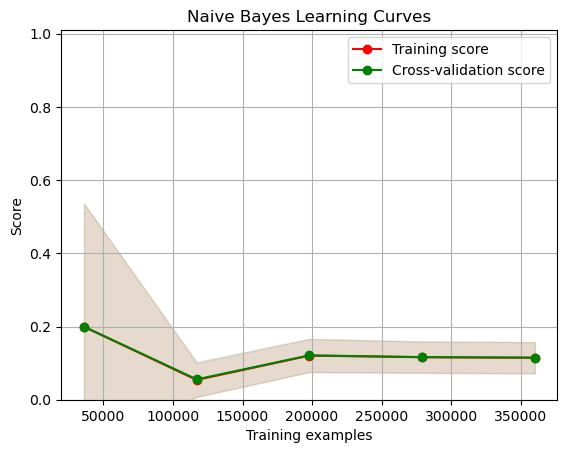

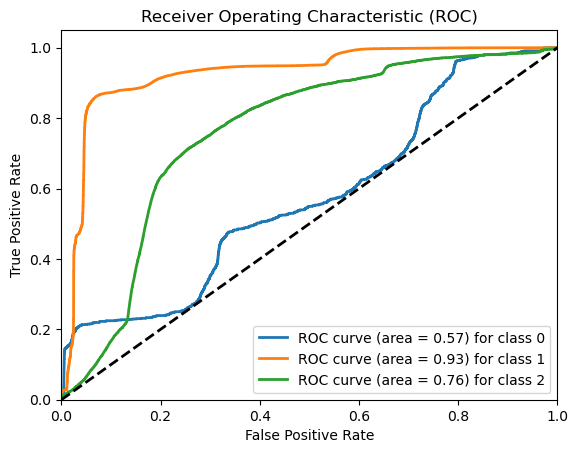

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import learning_curve

# Assuming df is your DataFrame
# df = pd.read_csv('your_dataset.csv')

# Split data into features and target
X = df.drop(columns=['fare_amount','tip_amount','extra','congestion_surcharge',
                     'mta_tax','tolls_amount','improvement_surcharge',
                     'total_amount_category','pu_state', 'do_state', 'pu_zone', 'do_zone','total_amount','trip_duration'])
y = df['total_amount_category']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Naive Bayes model
model = GaussianNB()

# Evaluate the model on the test set
def evaluate_model_with_cv(model, X, y):
    # Perform k-fold cross-validation
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"Cross-validation scores: {cv_scores}")
    print(f"Mean accuracy: {cv_scores.mean()}")
    print(f"Standard deviation of accuracy: {cv_scores.std()}")
    
    # Fit the model and make predictions
    model.fit(X, y)
    y_pred = model.predict(X)
    
    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y, y_pred))
    
    # Calculate confusion matrix and convert to percentages
    cm = confusion_matrix(y, y_pred)
    cm_percentage = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100, 2)
    
    # Print confusion matrix as percentages with desired formatting
    print("\nConfusion Matrix (percentages):")
    for row in cm_percentage:
        print(" ".join(f"{val:.1f}" for val in row))

print("Test Set Evaluation:")
evaluate_model_with_cv(model, X_test_scaled, y_test)

# Plot learning curves manually
train_sizes, train_scores, test_scores = learning_curve(model, X_train_scaled, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Naive Bayes Learning Curves")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.ylim((0.0, 1.01))  # Adjust y-axis scale to range from 0 to 1
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()

# Plot ROC curve
y_bin_test = label_binarize(y_test, classes=np.unique(y_test))
n_classes_test = y_bin_test.shape[1]

if n_classes_test == 1:
    y_bin_test = np.hstack([1 - y_bin_test, y_bin_test])
    n_classes_test = 2

y_score_test = model.predict_proba(X_test_scaled)
fpr_test = dict()
tpr_test = dict()
roc_auc_test = dict()
for i in range(n_classes_test):
    fpr_test[i], tpr_test[i], _ = roc_curve(y_bin_test[:, i], y_score_test[:, i])
    roc_auc_test[i] = auc(fpr_test[i], tpr_test[i])

plt.figure()
for i in range(n_classes_test):
    plt.plot(fpr_test[i], tpr_test[i], lw=2, label=f'ROC curve (area = {roc_auc_test[i]:.2f}) for class {i}')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


## COMPARISON 

## This a comparison between all the classifiers perfomance by order from the highest to lowest 

## Performance Ranking:
## Random Forest:
Highest overall accuracy (0.99) and strong performance across all categories.
## Decision Trees:
Good balance with 0.98 accuracy and strong precision and recall for High and Medium categories.
## K-Nearest Neighbors:
Similar accuracy (0.98) but lower recall for High category.
## Logistic Regression:
High overall accuracy (0.98) but poor performance for High category.
## Naive Bayes:
Poor overall accuracy (0.03) and not effective for this dataset.



## ALL THE BELOW ARE THE SAME CLASSIFIERS BUT WITHOUT THE LEARNING CURVES AND ROC

In [17]:
# Run specific classifier
classifier_to_run = 'Decision Tree'  # Change this to the classifier you want to run
run_classifier(classifier_to_run)

Evaluation for Decision Tree:
Cross-validation scores: [0.97311798 0.97254035 0.97278473 0.97293995 0.97251783]
Mean accuracy: 0.9727801683076036
Standard deviation of accuracy: 0.00023065217958933085

Classification Report:
              precision    recall  f1-score   support

        High       0.57      0.60      0.59      1016
         Low       0.99      0.99      0.99    182430
      Medium       0.72      0.73      0.73      9460

    accuracy                           0.97    192906
   macro avg       0.76      0.77      0.77    192906
weighted avg       0.97      0.97      0.97    192906


Confusion Matrix (percentages):
60.3 6.6 33.1
0.1 98.7 1.3
4.0 22.6 73.5


In [97]:
# Check the columns in the original dataset
print("Columns in the Original Dataset:")
print(df.columns.tolist())




Columns in the Original Dataset:
['passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'total_amount_category', 'congestion_surcharge', 'pu_state', 'pu_zone', 'do_state', 'do_zone', 'trip_duration', 'pickup_date_label', 'dropoff_date_label', 'vendor_Creative Mobile Technologies, LLC', 'vendor_VeriFone Inc.', 'store_and_fwd_flag_N', 'store_and_fwd_flag_Y', 'rate_type_Negotiated fare', 'rate_type_Standard rate', 'rate_type_other', 'payment_type_Cash', 'payment_type_Credit card', 'payment_type_Missing', 'payment_type_Neither', 'trip_type_Dispatch', 'trip_type_Street-hail', 'trip_type_Unknown', 'pickup_hour', 'dropoff_hour', 'pickup_day_of_week', 'dropoff_day_of_week', 'trip_duration_seconds']


In [98]:
# Run specific classifier
classifier_to_run = 'KNN'  # Change this to the classifier you want to run
run_classifier(classifier_to_run)

Evaluation for KNN:
Cross-validation scores: [0.97880542 0.97858325 0.9789165  0.97931617 0.97864966]
Mean accuracy: 0.9788541994064419
Standard deviation of accuracy: 0.00025881394090256803

Classification Report:
              precision    recall  f1-score   support

        High       0.78      0.54      0.64      1016
         Low       0.99      0.99      0.99    182430
      Medium       0.80      0.77      0.79      9460

    accuracy                           0.98    192906
   macro avg       0.86      0.77      0.81    192906
weighted avg       0.98      0.98      0.98    192906


Confusion Matrix:
[[   550     66    400]
 [     9 181002   1419]
 [   149   1995   7316]]


In [139]:
# Run specific classifier
classifier_to_run = 'Naive Bayes'  # Change this to the classifier you want to run
run_classifier(classifier_to_run)

Evaluation for Naive Bayes:
Cross-validation scores: [0.16700177 0.02929251 0.1644913  0.16573726 0.16715914]
Mean accuracy: 0.13873639602413407
Standard deviation of accuracy: 0.054730445890757894

Classification Report:
              precision    recall  f1-score   support

        High       0.01      0.47      0.01      1016
         Low       0.99      0.12      0.22    182430
      Medium       0.09      0.91      0.16      9460

    accuracy                           0.16    192906
   macro avg       0.36      0.50      0.13    192906
weighted avg       0.94      0.16      0.22    192906


Confusion Matrix:
[[  477     6   533]
 [70080 22510 89840]
 [  705   130  8625]]


In [100]:
# Run specific classifier
classifier_to_run = 'Logistic Regression'  # Change this to the classifier you want to run
run_classifier(classifier_to_run)

Evaluation for Logistic Regression:
Cross-validation scores: [0.97832776 0.97821668 0.97806116 0.97871631 0.97707227]
Mean accuracy: 0.9780788371606922
Standard deviation of accuracy: 0.0005478734986891037

Classification Report:
              precision    recall  f1-score   support

        High       0.88      0.36      0.51      1016
         Low       0.99      0.99      0.99    182430
      Medium       0.81      0.75      0.78      9460

    accuracy                           0.98    192906
   macro avg       0.89      0.70      0.76    192906
weighted avg       0.98      0.98      0.98    192906


Confusion Matrix:
[[   364     78    574]
 [     5 181373   1052]
 [    46   2327   7087]]


In [18]:
df["total_amount_category"].value_counts(normalize = True)*100


total_amount_category
Low       94.539197
Medium     4.939512
High       0.521291
Name: proportion, dtype: float64